In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cebra
import cebra.datasets
from cebra import CEBRA


### 1. Load in Mthal data 
- CEBRA models 
- corrisponding embeddings (create from models and neural data)
- discerte_lables (what was used to train the model)
###### Neural Data
- neural_data (all nerual data (100%) full recording), 
- neural_train (neural data seperated into training group (80% of neural_data) that made corresponding cebra model)
- neural_test (neural data seperated into test group (20% of neural_data) that made corresponding cebra model)

In [126]:
mouse = 'reach1_4'

In [127]:
# variables to load different models and neural data
num_reaches = 278
probe = 'B' # probe used for the neural data
bin_size_in_ms = 50 # in milliseconds
output_dimension = 32 # number of dimensions for the embeddingspre
pre_reach = 1
post_reach = 10

load full neural_data

In [128]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)

(538, 61160)
(61160, 538)


load neural data (train and test)

In [129]:
path_ = f'train_test_data/{mouse}_neural_train.npy'
neural_train = np.load(path_)

path_ = f'train_test_data/{mouse}_neural_test.npy'
neural_test = np.load(path_)

path_ = f'train_test_data/{mouse}_label_train.npy'
label_train = np.load(path_)

path_ = f'train_test_data/{mouse}_label_test.npy'
label_test = np.load(path_)

neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48928, 538), (12232, 538), (48928, 2), (12232, 2))

load cebra models and make embeddings

In [130]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'B' # probe letter

In [131]:
# We get train set embedding and test set embedding.
cebra_posdir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_posdir_train = cebra_posdir_model.transform(neural_train)
cebra_posdir_test = cebra_posdir_model.transform(neural_test)

cebra_pos_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_pos_train = cebra_pos_model.transform(neural_train)
cebra_pos_test = cebra_pos_model.transform(neural_test)

cebra_dir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_dir_train = cebra_dir_model.transform(neural_train)
cebra_dir_test = cebra_dir_model.transform(neural_test)

cebra_pos_all = cebra_pos_model.transform(neural_data_transposed)
cebra_dir_all = cebra_dir_model.transform(neural_data_transposed)
cebra_posdir_all = cebra_posdir_model.transform(neural_data_transposed)


load discerte_lables 

In [132]:
load_path = f'discrete_lables/{mouse}_trial_ID_SF.npy'
discrete_labled_loaded = np.load(load_path)
discete_lables = discrete_labled_loaded
discete_lables.shape
np.unique(discete_lables[:,0]), np.unique(discete_lables[:,1])

(array([0., 1., 2.]), array([0., 1.]))

preview embeddings

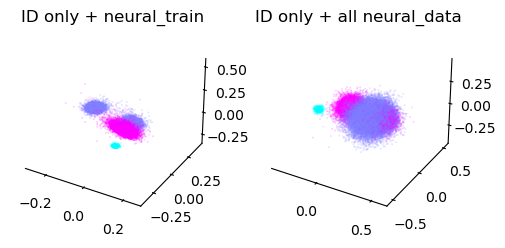

((48928, 32), (61160, 32))

In [133]:
fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')

ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_train, embedding_labels=label_train[:,0], title='ID only + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=discete_lables[:,0], title='ID only + all neural_data')

plt.show()
cebra_posdir_train.shape, cebra_pos_all.shape

In [135]:
mthal_embedding_train = cebra_posdir_train
mthal_embedding_all = cebra_pos_all

### 1.2 Load in M1 data 


In [136]:
probe = 'A' # probe used for the neural data
P = probe

load full neural data

In [137]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)

(45, 61160)
(61160, 45)


load neural_data (test and train)

In [138]:
def split_data(data, test_ratio):

    split_idx = int(len(data)* (1-test_ratio))
    neural_train = neural_data_transposed[:split_idx]
    neural_test = neural_data_transposed[split_idx:]
    label_train = discete_lables[:split_idx]
    label_test = discete_lables[split_idx:]

    return neural_train, neural_test, label_train, label_test

neural_train, neural_test, label_train, label_test = split_data(neural_data_transposed, 0.2)
neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48928, 45), (12232, 45), (48928, 2), (12232, 2))

load cebra models and make embeddings

In [139]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'A' # probe letter

In [140]:
np.unique(label_train[:,0]), np.unique(label_train[:,1])

(array([0., 1., 2.]), array([0., 1.]))

In [141]:
# We get train set embedding and test set embedding.
cebra_posdir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_trialID_SucessFailure_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_posdir_train = cebra_posdir_model.transform(neural_train)
cebra_posdir_test = cebra_posdir_model.transform(neural_test)

cebra_pos_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_pos_train = cebra_pos_model.transform(neural_train)
cebra_pos_test = cebra_pos_model.transform(neural_test)

cebra_dir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_dir_train = cebra_dir_model.transform(neural_train)
cebra_dir_test = cebra_dir_model.transform(neural_test)

cebra_pos_all = cebra_pos_model.transform(neural_data_transposed)
cebra_dir_all = cebra_dir_model.transform(neural_data_transposed)
cebra_posdir_all = cebra_posdir_model.transform(neural_data_transposed)

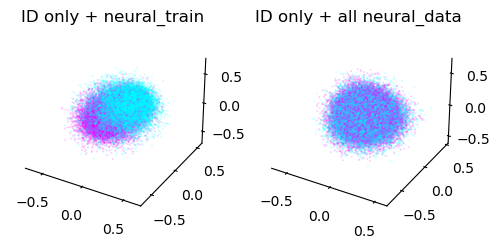

((48928, 32), (61160, 32))

In [142]:
fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')

ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_train, embedding_labels=label_train[:,1], title='ID only + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=discete_lables[:,1], title='ID only + all neural_data')

plt.show()
cebra_posdir_train.shape, cebra_pos_all.shape

In [143]:
m1_embedding_train= cebra_posdir_train
m1_embedding_all = cebra_pos_all

### 2. Construct RNN

In [145]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

prepare input and target data

In [151]:
input = mthal_embedding
target = m1_embedding_train
input.shape, target.shape   

((48928, 32), (48928, 32))

In [150]:

# Assuming input and target are numpy arrays or PyTorch tensors of shape (48928, 32)
# First, calculate the number of complete reaches in the training set
num_reaches_train = 278 * 0.8  # Calculate 80% of reaches for training
pri
# Since each reach has 210 time bins, calculate the total number of bins used for training
total_bins_train = int(num_reaches_train * 220)  # Make sure to use int for exact number conversion

# Now reshape input and target tensors for the training set
input_tensor = torch.tensor(input[:total_bins_train]).reshape(-1, 220, 32)  # Reshape to (222, 210, 32)
target_tensor = torch.tensor(target[:total_bins_train]).reshape(-1, 220, 32)  # Reshape to (222, 210, 32)

# Create a TensorDataset
train_dataset = TensorDataset(input_tensor, target_tensor)

# Optionally create a validation dataset using the remaining data if needed


RuntimeError: shape '[-1, 220, 32]' is invalid for input of size 1565696

In [149]:
# Assuming input and target are numpy arrays or PyTorch tensors of shape (48928, 32)
input_tensor = torch.tensor(input).reshape(-1, 220, 32)  # Reshape to (233, 210, 32)
target_tensor = torch.tensor(target).reshape(-1, 220, 32)  # Reshape to (233, 210, 32)

# Create a TensorDataset
dataset = TensorDataset(input_tensor, target_tensor)

# Split into training and validation sets if needed, or use the whole dataset for training
train_dataset = dataset  # As an example, use the whole dataset


RuntimeError: shape '[-1, 220, 32]' is invalid for input of size 1565696

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Assuming input and target are numpy arrays or PyTorch tensors of shape (48928, 32)
input_tensor = torch.tensor(input).reshape(-1, 210, 32)  # Reshape to (233, 210, 32)
target_tensor = torch.tensor(target).reshape(-1, 210, 32)  # Reshape to (233, 210, 32)

# Create a TensorDataset
dataset = TensorDataset(input_tensor, target_tensor)

# Split into training and validation sets if needed, or use the whole dataset for training
train_dataset = dataset  # As an example, use the whole dataset


PyTorch rnn

In [ ]:
# Adjusting the model for the specific neural data task
class NeuralRNN(nn.Module):
    def __init__(self, input_size=32, hidden_size=64, num_layers=1, output_size=32):
        super(NeuralRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)  # Apply the linear layer to each time step
        return out

# Create an instance of the NeuralRNN
neural_rnn = NeuralRNN()

# Example input tensor for a single reach, shape (1, 210, 32)
example_input = torch.randn(1, 210, 32)

# Get the model output for the example input
output = neural_rnn(example_input)
print(output.shape)  # Should be (1, 210, 32) matching the target shape


### 3. Train RNN 
- Input: Mthal embedding data
- Targert: M1 embedding data
- Output: Predicted M1 embedding data


### 4. Visualize Embeddings
- Compare cebra M1 embeddings to RNN predicted embeddings

### 5. Decode lables from embeddings
- Decode lables (trial_ID, Success or Failure) from cebra embeddings
- Decode lables (trial_ID, Success or Failure) from RNN predicted embeddings

### 6. Pass real M1 embeddings cerebellar SNN
- See if SNN can predict when their is an error